In [53]:
#first we import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
#import the tables prvovided for the problem statement

email_df = pd.read_csv("email_table.csv")
opened_df = pd.read_csv("email_opened_table.csv")
clicked_df = pd.read_csv("link_clicked_table.csv")

#merge the email_opened_table and the link_clicked_table into the email_table
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)


In [6]:
email_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [65]:
from sklearn.preprocessing import LabelEncoder
df = email_df.copy()
categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']
# Apply Label Encoding to convert string values of categorical data into numerical values
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [67]:
df.head()


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,1,1,2,3,3,5,0,0
1,966622,0,1,12,3,2,2,1,1
2,777221,0,1,11,6,3,2,0,0
3,493711,1,0,6,1,2,1,0,0
4,106887,0,0,14,1,3,6,0,0


In [69]:
df.shape

(100000, 9)

In [71]:
df.dtypes

email_id               int64
email_text             int32
email_version          int32
hour                   int64
weekday                int32
user_country           int32
user_past_purchases    int64
opened                 int32
clicked                int32
dtype: object

In [73]:
#checking if any column has missing values
print("Any null values? ", df.isnull().values.any())

Any null values?  False


In [75]:
#to display the percentage of users opening the email and the percentage of users clicking on the link inside the email


total_emails = len(email_df)
opened_emails = len(opened_df)
clicked_emails = len(clicked_df)
open_percentage = (opened_emails / total_emails) * 100
click_percentage = (clicked_emails / total_emails) * 100


print(f"Percentage of users who opened the email: {open_percentage:.2f}%")
print(f"Percentage of users who clicked on the link: {click_percentage:.2f}%")

Percentage of users who opened the email: 10.35%
Percentage of users who clicked on the link: 2.12%


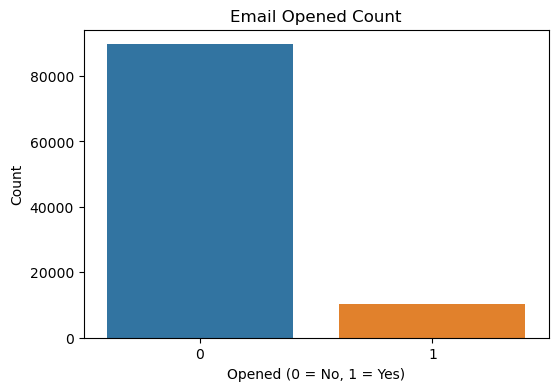

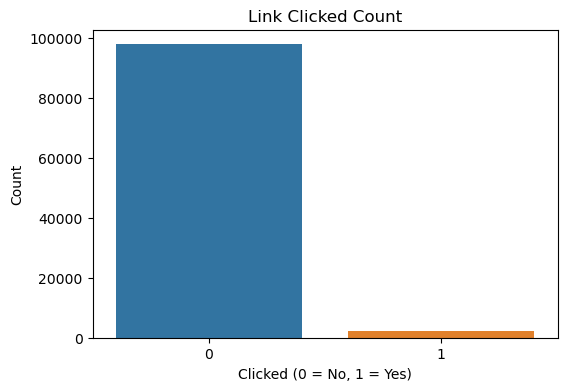

In [77]:
#plotting email openend count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='opened')
plt.title('Email Opened Count')
plt.xlabel('Opened (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#plotting link clicked count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='clicked')
plt.title('Link Clicked Count')
plt.xlabel('Clicked (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


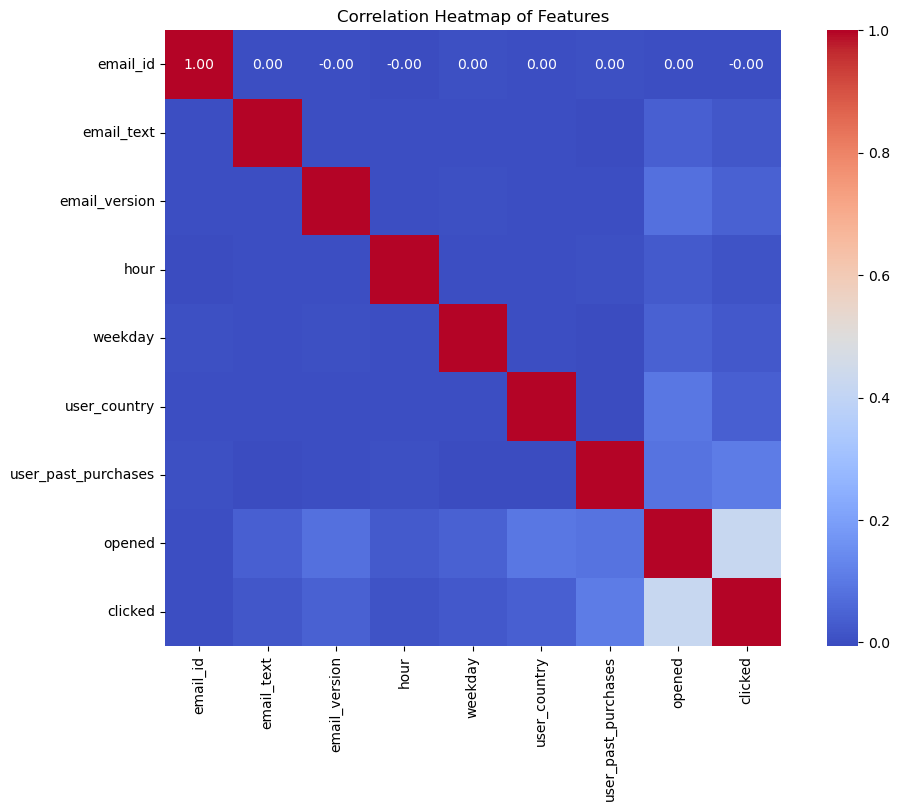

In [79]:
#plotting heatmap to see which features are roughly correlated to other features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

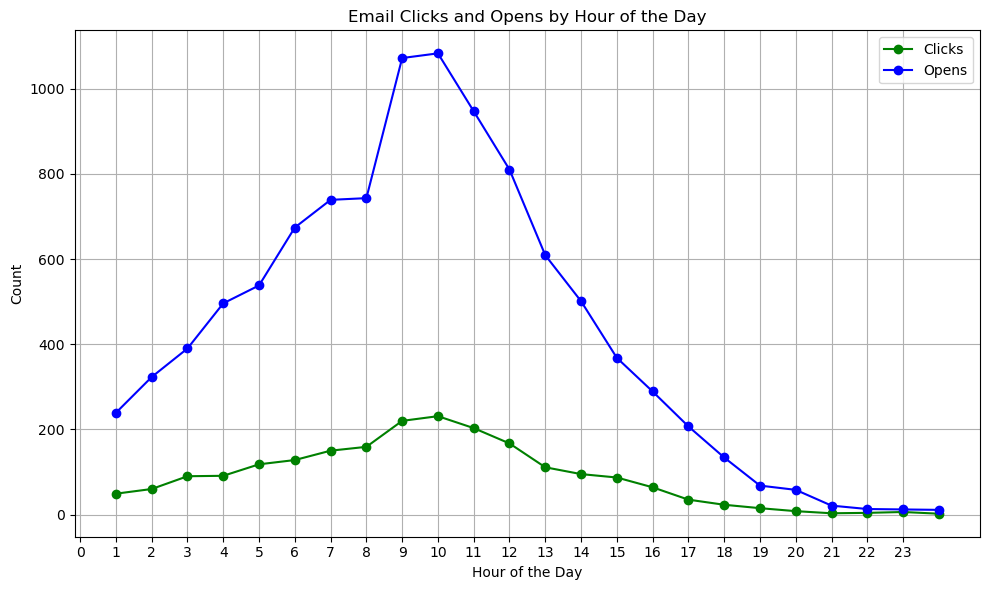

In [15]:
#line graph to visualise no. of emails opened and no. of times link was clicked based on hour of the day
clicks_by_hour = df.groupby('hour')['clicked'].sum()
opens_by_hour = df.groupby('hour')['opened'].sum()


plt.figure(figsize=(10, 6))


plt.plot(clicks_by_hour.index, clicks_by_hour.values, marker='o', label='Clicks', color='green')


plt.plot(opens_by_hour.index, opens_by_hour.values, marker='o', label='Opens', color='blue')

plt.title('Email Clicks and Opens by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  # Assuming hour is from 0 to 23
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

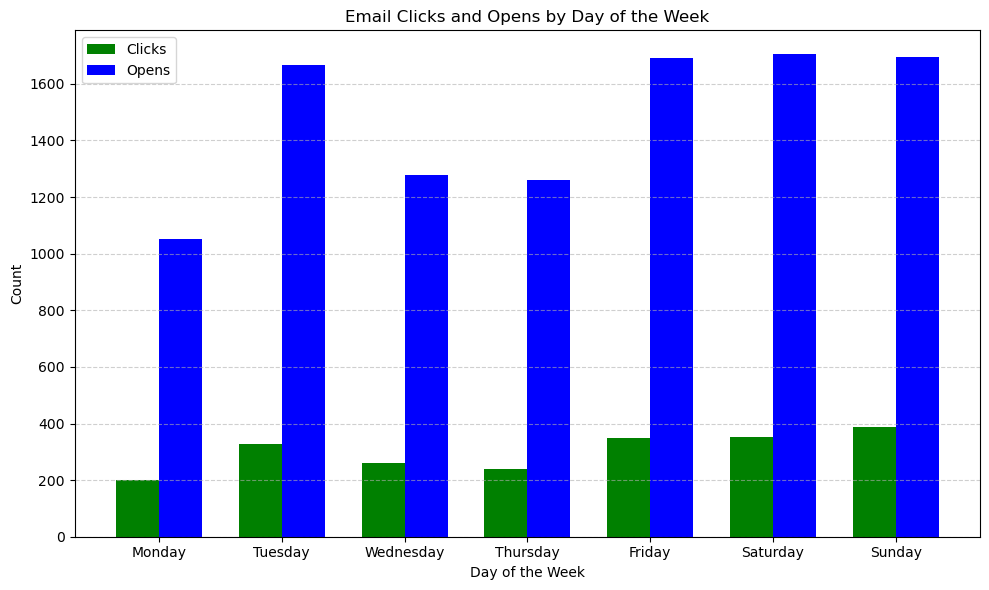

In [83]:
#visualising no. of emails opened and no. of times link was clicked based on day of the week
weekday_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}


df['weekday_name'] = df['weekday'].map(weekday_map)

clicks_by_day = df.groupby('weekday_name')['clicked'].sum()
opens_by_day = df.groupby('weekday_name')['opened'].sum()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
clicks_by_day = clicks_by_day.reindex(weekday_order)
opens_by_day = opens_by_day.reindex(weekday_order)


x = np.arange(len(weekday_order))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, clicks_by_day.values, width, label='Clicks', color='green')
plt.bar(x + width/2, opens_by_day.values, width, label='Opens', color='blue')


plt.title('Email Clicks and Opens by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(x, weekday_order)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Open Rate: 0.10345
Click-Through Rate: 0.02119


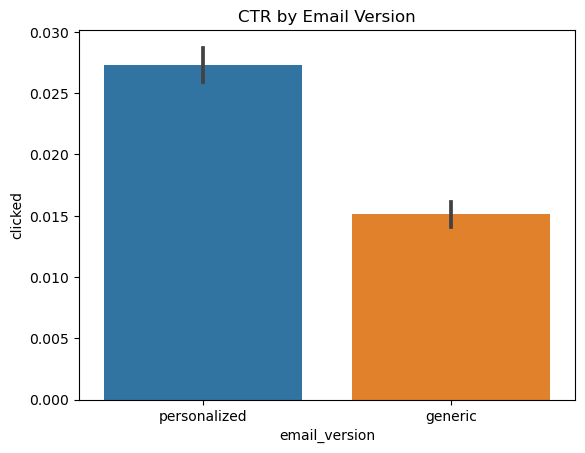

In [85]:
#CTR based on email version
print("Open Rate:", df['opened'].mean())
print("Click-Through Rate:", df['clicked'].mean())

sns.barplot(x='email_version', y='clicked', data=email_df)
plt.title("CTR by Email Version")
plt.show()

C:\Users\purpl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purpl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


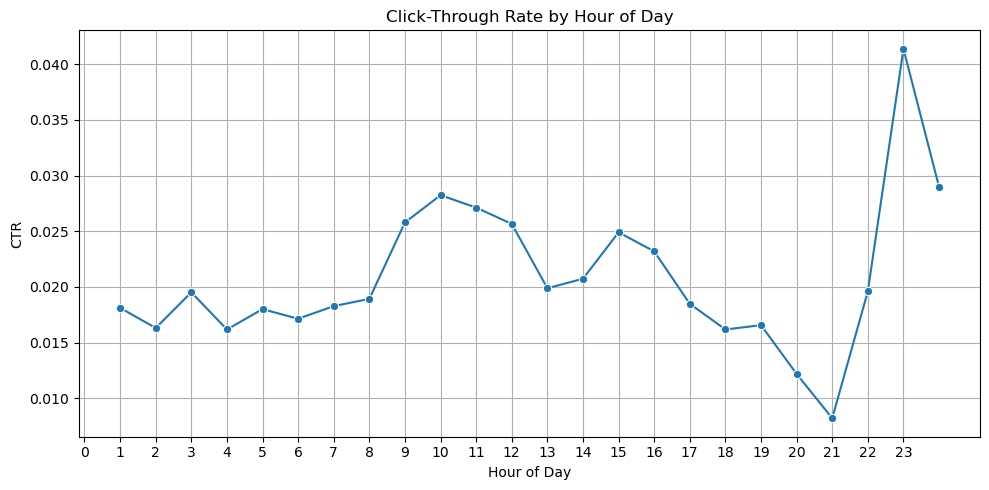

In [18]:
hourly_ctr = df.groupby('hour')['clicked'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_ctr, x='hour', y='clicked', marker='o')
plt.title("Click-Through Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("CTR")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

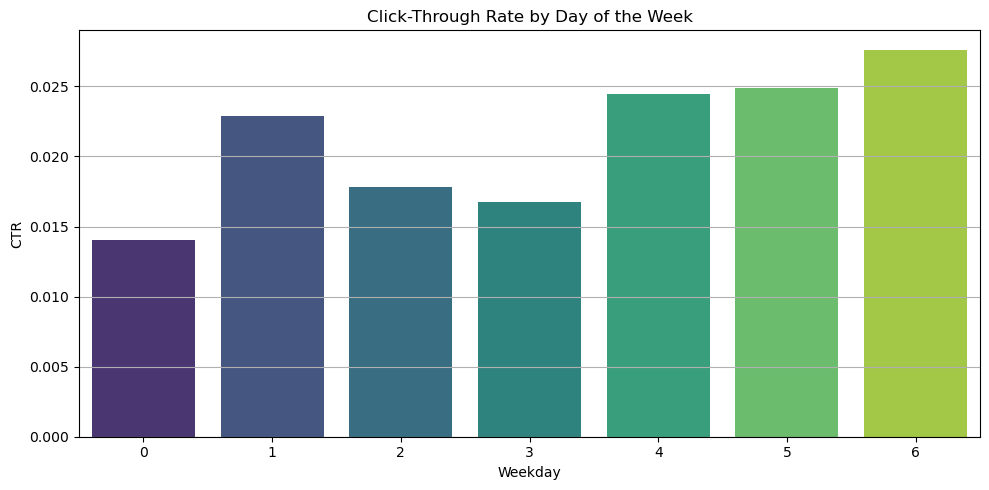

In [19]:
weekday_ctr = df.groupby('weekday')['clicked'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_ctr, x='weekday', y='clicked', palette='viridis')
plt.title("Click-Through Rate by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("CTR")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

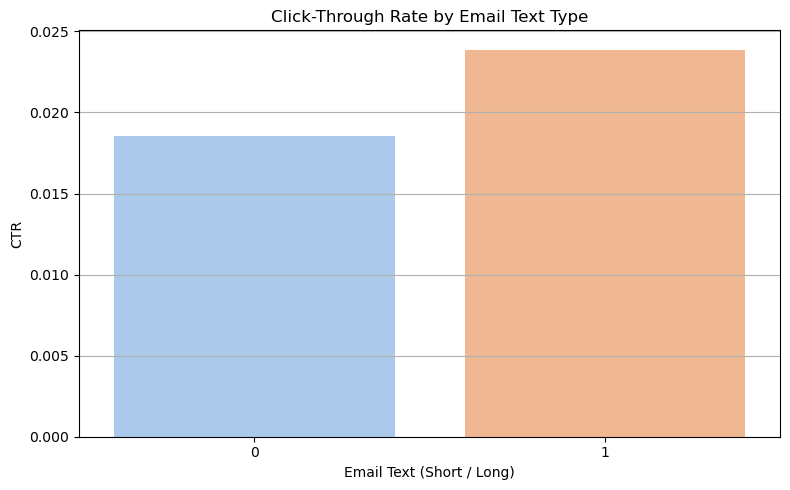

In [20]:
text_ctr = df.groupby('email_text')['clicked'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=text_ctr, x='email_text', y='clicked', palette='pastel')
plt.title("Click-Through Rate by Email Text Type")
plt.xlabel("Email Text (Short / Long)")
plt.ylabel("CTR")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

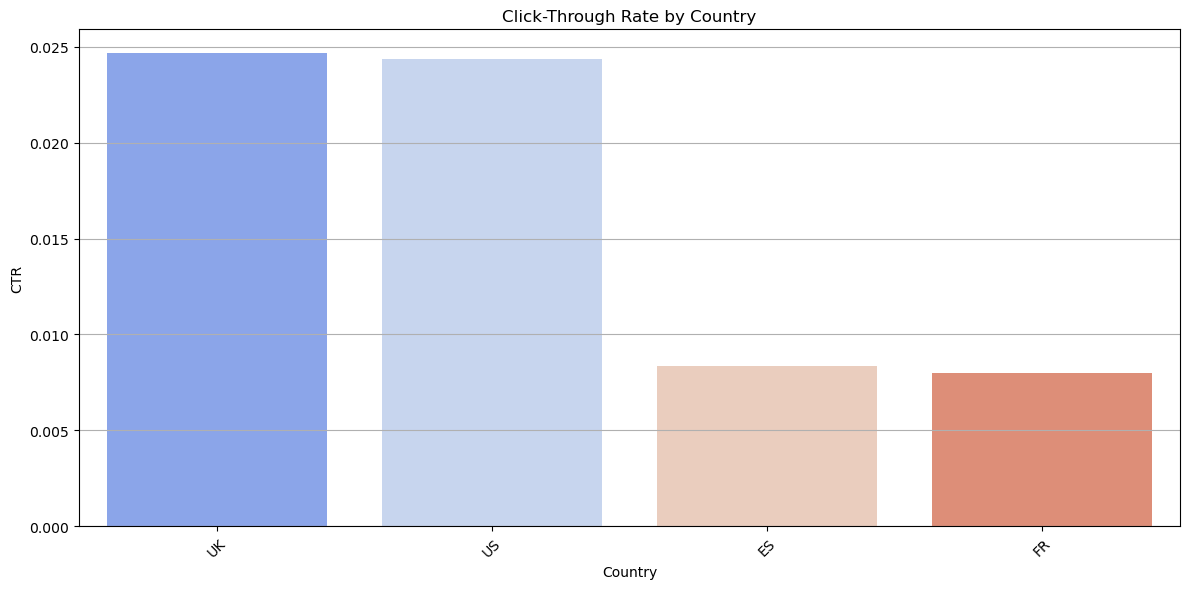

In [21]:
df['user_country_full'] = label_encoders['user_country'].inverse_transform(df['user_country'])


country_ctr = df.groupby('user_country_full')['clicked'].mean().reset_index().sort_values(by='clicked', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_ctr, x='user_country_full', y='clicked', palette='coolwarm')
plt.title("Click-Through Rate by Country")
plt.xlabel("Country")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

C:\Users\purpl\AppData\Local\Temp\ipykernel_14312\2689340947.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_ctr = df.groupby('purchase_bin')['clicked'].mean().reset_index()
C:\Users\purpl\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


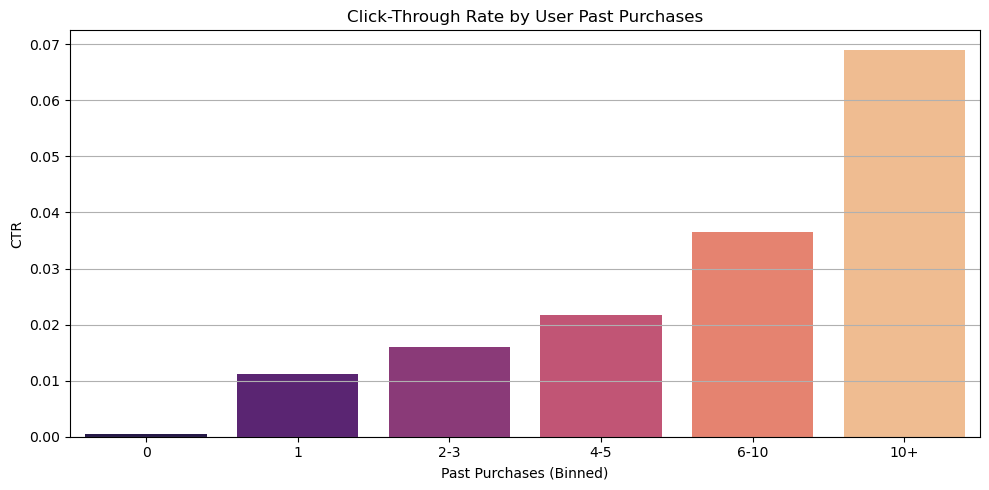

In [22]:
# Optional: bin purchases for better visualization
df['purchase_bin'] = pd.cut(df['user_past_purchases'], bins=[-1, 0, 1, 3, 5, 10, np.inf], 
                             labels=['0', '1', '2-3', '4-5', '6-10', '10+'])

purchase_ctr = df.groupby('purchase_bin')['clicked'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=purchase_ctr, x='purchase_bin', y='clicked', palette='magma')
plt.title("Click-Through Rate by User Past Purchases")
plt.xlabel("Past Purchases (Binned)")
plt.ylabel("CTR")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


📊 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.00      0.00      0.00       424

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000

AUC Score: 0.7219


C:\Users\purpl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\purpl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\purpl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.06      0.01      0.02       424

    accuracy                           0.98     20000
   macro avg       0.52      0.50      0.50     20000
weighted avg       0.96      0.98      0.97     20000

AUC Score: 0.5775


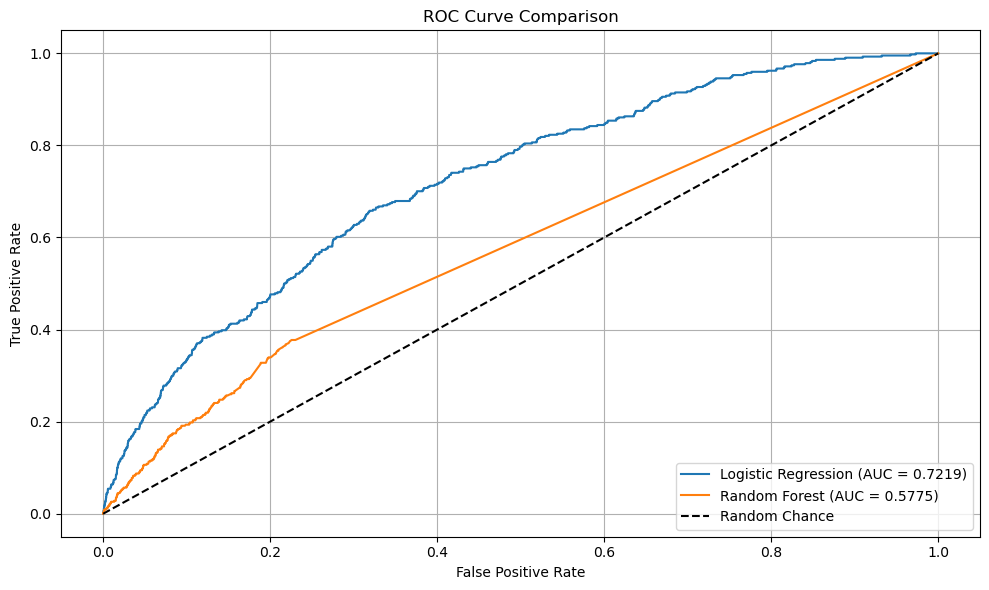

In [87]:
#we will compare random forest and logistic regression to see which model gives the best CTR 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


features = ['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']
X = df[features]
y = df['clicked']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Print metrics
    print(f"\n📊 Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.4f})")

# Final plot tweaks
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
#now we compare the CTR before using the ml model and after using it
model = models["Random Forest"]
y_proba = model.predict_proba(X_test)[:, 1]
baseline_ctr = y_test.mean()
X_test_copy = X_test.copy()
X_test_copy['actual'] = y_test
X_test_copy['predicted_proba'] = y_proba
top_30_percent = X_test_copy.sort_values(by='predicted_proba', ascending=False).head(int(0.3 * len(X_test_copy)))
model_ctr = top_30_percent['actual'].mean()
print(f"📉 Baseline CTR (Random Send): {baseline_ctr:.4f}")
print(f"🚀 Model-Based CTR (Top 30%): {model_ctr:.4f}")
improvement = (model_ctr - baseline_ctr) / baseline_ctr * 100
print(f"✅ Estimated CTR Improvement: {improvement:.2f}%")

📉 Baseline CTR (Random Send): 0.0212
🚀 Model-Based CTR (Top 30%): 0.0307
✅ Estimated CTR Improvement: 44.65%


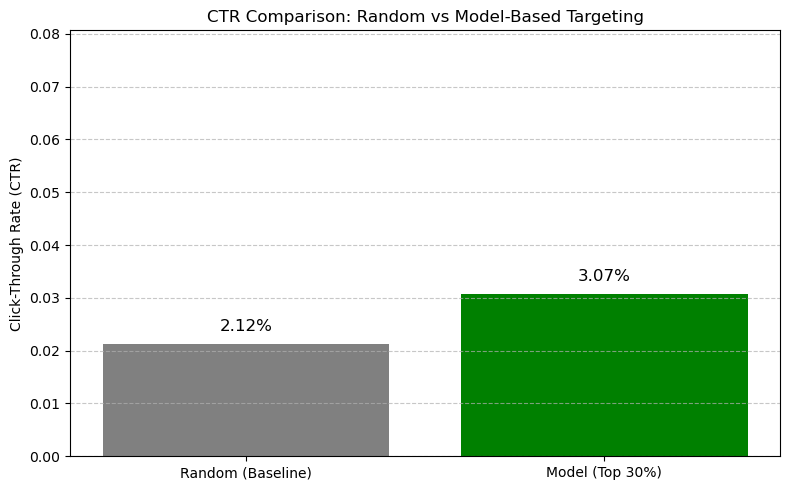

In [91]:
#visualing the improvement int the CTR by using the model
ctr_values = [baseline_ctr, model_ctr]
labels = ['Random (Baseline)', 'Model (Top 30%)']
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, ctr_values, color=['gray', 'green'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.002, f"{height:.2%}", ha='center', va='bottom', fontsize=12)

plt.ylim(0, max(ctr_values) + 0.05)
plt.title("CTR Comparison: Random vs Model-Based Targeting")
plt.ylabel("Click-Through Rate (CTR)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


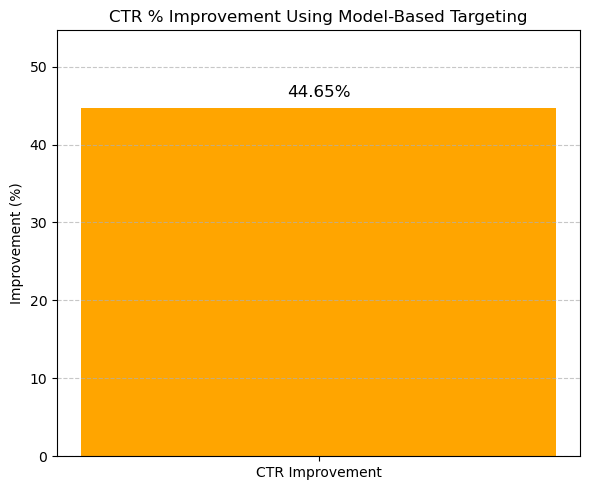

In [93]:
ctr_improvement = ((model_ctr - baseline_ctr) / baseline_ctr) * 100
plt.figure(figsize=(6, 5))
bar = plt.bar(['CTR Improvement'], [ctr_improvement], color='orange')
plt.text(0, ctr_improvement + 1, f"{ctr_improvement:.2f}%", ha='center', va='bottom', fontsize=12)
plt.title("CTR % Improvement Using Model-Based Targeting")
plt.ylabel("Improvement (%)")
plt.ylim(0, ctr_improvement + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [89]:
I observed several notable patterns in how the email campaign performed across different user segments:

1. **📅 Timing Matters**  
   - **CTR varied by hour of the day**: Certain hours (like mornings or early evenings) had noticeably higher engagement.  
   - **Day of the week** also played a role, with midweek emails often performing better than those sent on weekends.

2. **🌍 Regional Differences**  
   - Users from some **countries consistently showed higher CTRs**. This could be due to cultural responsiveness, time zones, or user familiarity with the brand.

3. **📝 Email Text Format**  
   - **Short emails** tended to perform slightly better than long ones, suggesting that concise messages may lead to quicker user action.

4. **🎯 Personalization Works**  
   - Emails with **personalized greetings** had higher CTRs compared to generic versions, reinforcing the value of personalization in email marketing.

5. **💸 User Purchase History**  
   - Users with **more past purchases** had significantly higher CTRs. This indicates that previous buyers are more engaged and more likely to interact with marketing content.

These insights can help in tailoring future email strategies by refining segmentation, optimizing timing, and applying personalized content to improve overall campaign performance.


SyntaxError: invalid character '📅' (U+1F4C5) (2392580520.py, line 3)